In [196]:
import numpy as np
from matplotlib import pyplot as plt
import math
from numpy.linalg import inv


# a)

\begin{equation}
i\hbar \partial_t\psi(x,t)=\left(-\frac{\hbar^2}{2m} \vec{\nabla}^2+\frac{1}{2}m\omega^2x^2 \right)\psi(x,t)=\hat{H}\psi(x,t) \tag{1}
\end{equation}

take out $\frac{\omega \hbar}{2}$ from right hand side:

\begin{equation}
i\hbar \partial_t\psi(x,t)=\frac{\omega \hbar}{2}\left(-\frac{\hbar}{m\omega} \vec{\nabla}^2+\frac{m\omega}{\hbar}x^2 \right)\psi(x,t)=\hat{H}\psi(x,t)  \tag{2}
\end{equation}

We devide above equation by $\hbar$. Then, introducing  $\alpha^2=\frac{m \omega}{\hbar}$, we get

\begin{equation}
i\partial_t\psi(x,t)=\frac{\omega}{2}\left(-\frac{1}{\alpha^2} \frac{\partial^2}{\partial x^2} +\alpha^2x^2 \right)\psi(x,t)=\frac{1}{\hbar}\hat{H}\psi(x,t)  \tag{3}
\end{equation}

Multipling  with   $2/\omega$ and introducing new variables $\xi=\alpha x$, $\tau=\frac{\omega t}{2}$ we get:

\begin{equation}
i\partial_\tau\psi=\left(- \frac{\partial^2}{\partial \xi^2} +\xi^2 \right)\psi=\frac{2}{\hbar\omega} \hat{H}\psi=\hat{\tilde{H}}\psi   \tag{4}
\end{equation}
where $\hat{\tilde{H}}=\frac{2}{\hbar\omega} \hat{H}$. Hence $\beta=\frac{2}{\hbar\omega}$.



# b)

In [197]:
ksi_l=-10
ksi_r=10
dksi=0.1    # correspond to delta x
dtau=0.005   #correspond to delta t
xi = np.arange(ksi_l, ksi_r + dksi, dksi)  # range is from -10 to 10 with 0.1 step. 10 is alos included
Nx = len(xi)    #number of steps
Nt=201   #number of time steps
print(Nx)
I = np.eye(Nt,dtype=complex)


201


In [198]:
H=np.zeros((Nt,Nx),dtype=complex)

In [199]:
def Hamilton(N_time,N_xi):

    for n in range(N_time):
        for m in range(N_xi):

            if m==n-1:
                H[n,n-1]=-1/dksi**2
            if m==n+1:
                H[n,n+1]=-1/dksi**2
            H[n,m]=2/dksi**2+dksi**2*n**2
    return H


In [200]:
Mat_min=I-1j*Hamilton(Nt,Nx)*dtau/2
Mat_pul=I+1j*Hamilton(Nt,Nx)*dtau/2

S_H=np.dot(np.linalg.inv(Mat_min),Mat_pul)
print(S_H)

[[ 0.99403603+3.55702382e-05j -0.00596397+3.55702382e-05j
  -0.00596397+3.55702382e-05j ... -0.00596397+3.55702382e-05j
  -0.00596397+3.55702382e-05j -0.00596397+3.55702382e-05j]
 [-0.00596427+3.55720168e-05j  0.99403573+3.55720168e-05j
  -0.00596427+3.55720168e-05j ... -0.00596427+3.55720168e-05j
  -0.00596427+3.55720168e-05j -0.00596427+3.55720168e-05j]
 [-0.00596517+3.55773523e-05j -0.00596517+3.55773523e-05j
   0.99403483+3.55773523e-05j ... -0.00596517+3.55773523e-05j
  -0.00596517+3.55773523e-05j -0.00596517+3.55773523e-05j]
 ...
 [-0.01765455+1.05295019e-04j -0.01765455+1.05295019e-04j
  -0.01765455+1.05295019e-04j ...  0.98234545+1.05295019e-04j
  -0.01765455+1.05295019e-04j -0.01765455+1.05295019e-04j]
 [-0.01777294+1.06001088e-04j -0.01777294+1.06001088e-04j
  -0.01777294+1.06001088e-04j ... -0.01777294+1.06001088e-04j
   0.98222706+1.06001088e-04j -0.01777294+1.06001088e-04j]
 [-0.01789192+1.06710715e-04j -0.01789192+1.06710715e-04j
  -0.01789192+1.06710715e-04j ... -0.01789

In [201]:
def wave_func(N_t,psi_0):
    psi_new=np.copy(psi_0)
    for n in range(N_t):
        psi_new=np.dot(S_H,psi_new)
    return psi_new


# c)

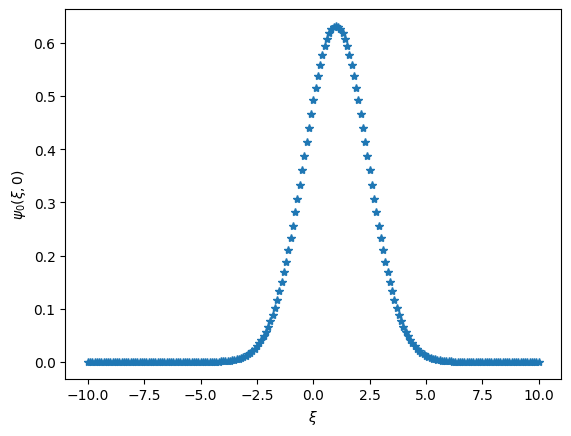

In [202]:
psi0=(1/2/np.pi)**0.25*np.exp(-(xi-1)**2/4)
plt.plot(xi,psi0,'*')
plt.ylabel(r'$\psi_0 (\xi,0)$')
plt.xlabel(r'$\xi$')
plt.show()


Discretization is done from -10 to 10 with 0.1 steps with 201 steps
$\xi_j=j\Delta \xi$


In [203]:

norm=np.sum(np.abs(psi0)**2)*dksi
print("Norm of wave function=",norm)


Norm of wave function= 1.0000000000000033


# d)

In [218]:
psi=np.zeros([Nt,Nx])
#psi[0]=psi0
psi_new=wave_func(Nt,psi0)
norm_each=np.sum(np.abs(psi_new)**2)*dksi
print(norm_each)
print(psi_new)



1.0212313957769705
[-0.01764377+0.04521996j -0.01764465+0.04522222j -0.0176473 +0.045229j
 -0.01765171+0.04524031j -0.01765789+0.04525614j -0.01766582+0.04527649j
 -0.01767553+0.04530136j -0.017687  +0.04533075j -0.01770023+0.04536466j
 -0.01771523+0.0454031j  -0.01773199+0.04544606j -0.01775051+0.04549354j
 -0.01777081+0.04554554j -0.01779286+0.04560207j -0.01781668+0.04566312j
 -0.01784226+0.04572868j -0.01786961+0.04579878j -0.01789872+0.04587339j
 -0.0179296 +0.04595252j -0.01796224+0.04603618j -0.01799664+0.04612436j
 -0.01803281+0.04621706j -0.01807075+0.04631428j -0.01811044+0.04641603j
 -0.0181519 +0.0465223j  -0.01819513+0.04663308j -0.01824012+0.0467484j
 -0.01828686+0.04686823j -0.01833537+0.04699258j -0.01838564+0.04712146j
 -0.01843767+0.04725486j -0.01849145+0.04739278j -0.01854697+0.04753522j
 -0.01860424+0.04768219j -0.01866324+0.04783367j -0.01872396+0.04798968j
 -0.01878637+0.04815021j -0.01885045+0.04831527j -0.01891616+0.04848484j
 -0.01898345+0.04865894j -0.0190522